<h2>Predict whether a person will be diagnosed with diabetes or not - using KNN Algorithm</h2>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<h3>Import the Dataset </h3>

In [47]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3>Remove zero values and Import the mean values</h3>

In [48]:
not_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in not_zero:
    data[column] = data[column].replace(0,np.NaN)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN,mean)
    

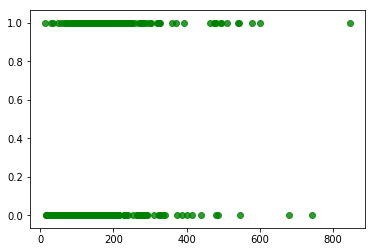

In [62]:
plt.scatter(data.Insulin,data.Outcome, alpha='0.8', color='green')

<h3>Split the Dataset</h3>

In [63]:
X = data.iloc[:, 0:8]
y = data['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

<h3> Choose a value of 'K' </h3><br>
<h4><ol><li>sqrt(n), Where 'n' is total number of data points</li><br>
    <li>Odd value of 'K' is selected to avoid confusion between two classes of data</li></ol> </h4>

In [51]:
import math
math.sqrt(len(y_test))

12.409673645990857

<h4> '12'  is even number,  so we will choose odd number for near the 12.<br><br><br> K = 11 </h4><br><br>

<h2>Define the KNN - model </h2>

In [52]:
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

<h3> Predict the Values</h3>

In [53]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
      dtype=int64)

<h3>Evaluate the Score</h3>

In [54]:
accuracy_score(y_pred,y_test)

0.7467532467532467

<h3> Make a Prediction</h3>

In [55]:
prediction=knn.predict([[6,148.0,62.0,35.0,455.0,33.6,0.627,30]])
prediction

array([1], dtype=int64)

<br>
<h2>Conclusion:</h2><br>
    
<h3> When insulin level is high, that person will be diagnosed with diabetes. So the prediction is correct.</h3> 

<br>
<br>
<center><h1>*** THE END ***</h1></center>